In [2]:
!pip install --upgrade pip

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 262.6 kB/s eta 0:00:08
   - -------------------------------------- 0.1/2.1 MB 393.8 kB/s eta 0:00:06
   --- ------------------------------------ 0.2/2.1 MB 821.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.1 MB 1.0 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.1 MB 1.3 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/2.1 MB 1.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.1 MB 1.8 MB/s eta 0:00:01
   ---------------- ----------------------- 0.9/2.1 MB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.1 MB 2.1 MB/s eta 0:00:01
   --------------------- ---------

ERROR: To modify pip, please run the following command:
C:\Users\HP\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install holidays


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import glob
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [5]:
# Get a list of all CSV files in a directory
csv_files = glob.glob('Data/*.csv')

# Create an empty dataframe to store the combined data
df = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    temp_df = pd.read_csv(csv_file)
    df = pd.concat([df, temp_df])

# Print the combined dataframe
print(df)

              ID                    Date        Primary Type  \
0        1326041  01/01/2001 01:00:00 AM             BATTERY   
1        1319931  01/01/2001 01:00:00 PM             BATTERY   
2        1324743  01/01/2001 01:00:00 PM            GAMBLING   
3        1310717  01/01/2001 01:00:00 AM     CRIMINAL DAMAGE   
4        1318099  01/01/2001 01:00:00 AM             BATTERY   
...          ...                     ...                 ...   
238853  12938029  12/31/2022 12:50:00 PM             ASSAULT   
238854  12937822  12/31/2022 12:50:00 PM             ASSAULT   
238855  12937583  12/31/2022 12:52:00 AM             BATTERY   
238856  12938420  12/31/2022 12:52:00 PM             ASSAULT   
238857  12939906  12/31/2022 12:59:00 PM  DECEPTIVE PRACTICE   

                                    Description          Location Description  \
0                                        SIMPLE                     RESIDENCE   
1                                        SIMPLE                     R

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [7]:
# Create # of crimes column to use later on
df['nbr_crimes'] = 1
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,nbr_crimes
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,1
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,1
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1


In [8]:
# Create Datetime column
df['Datetime'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  nbr_crimes            int64         
 13  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 779.7+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,nbr_crimes,Datetime
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1,2001-01-01 01:00:00
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,1,2001-01-01 13:00:00
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,1,2001-01-01 13:00:00
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1,2001-01-01 01:00:00
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1,2001-01-01 01:00:00


In [9]:
# Check for nulls
df.Datetime.isna().sum()

0

In [10]:
# creating the index
df = df.set_index('Datetime')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
 12  nbr_crimes            int64  
dtypes: bool(2), float64(4), int64(3), object(4)
memory usage: 720.9+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,nbr_crimes
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1
2001-01-01 13:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,1
2001-01-01 13:00:00,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,1
2001-01-01 01:00:00,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1
2001-01-01 01:00:00,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,1
2022-12-31 12:50:00,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,1
2022-12-31 00:52:00,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,1


In [11]:
# convert District to string
df['District'] = df['District'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              object 
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
 12  nbr_crimes            int64  
dtypes: bool(2), float64(3), int64(3), object(5)
memory usage: 720.9+ MB


# **TOPIC 1 : Comparing Police Districts:**


## **Which district had the most crimes and which had the least, in 2022 ?**

<Axes: xlabel='District'>

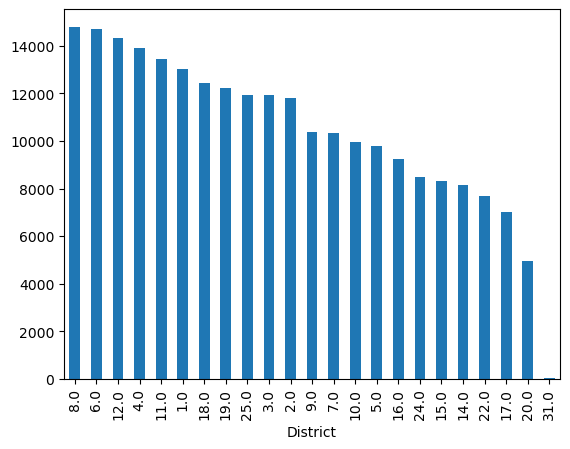

In [12]:
df.loc['2022'].groupby('District')['nbr_crimes'].sum().sort_values(ascending=False).plot.bar() # could've used count() also.

**ANSWER:** In year 2022, Police Distric 008 had the highest number of crimes while Police District 031 had the least.

# **TOPIC 2: Crimes across the years:**

## **Is the total number of crimes increasing or decreasing across the years?**

In [ ]:
yearly_df = df.resample('Y').sum().loc[:,'nbr_crimes']
yearly_df.plot()

**ANSWER:** The number of crimes is decreasing across the years, except for year 2021 to 2022.

## **Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?**

In [ ]:
yearly_crime_types_dict = {}

for pt in df['Primary Type'].unique():
  yearly_crime_types_dict[pt] = df[df['Primary Type']==pt].resample('Y').sum().loc[:,'nbr_crimes']
yearly_crime_types_dict['All Types'] = yearly_df
yearly_crime_types = pd.DataFrame(yearly_crime_types_dict)

In [ ]:
ax = yearly_crime_types.plot(figsize=(12,24))
ax.legend(bbox_to_anchor=(1,1))

**ANSWER:** All types of crimes are follwing the overall trend except for "OTHER NARCOTIC VIOLATION" which have been increasing since 2016.

# **Topic 3: Comparing AM vs. PM Rush Hour:**

In [ ]:
df['Hour'] = df.index.hour
df.head()

In [ ]:
df['AM_Rush_Hour'] = df['Hour'].apply(lambda x:1 if x in [7,8,9,10] else 0)

In [ ]:
df['PM_Rush_Hour'] = df['Hour'].apply(lambda x:1 if x in [16,17,18,19] else 0)

## **Are crimes more common during AM rush hour or PM rush hour?**

In [ ]:
plt.bar(['AM_Rush_Hour','PM_Rush_Hour'], [df['AM_Rush_Hour'].sum(),df['PM_Rush_Hour'].sum()],width = 0.4)

**ANSWER:** More crimes occured in the PM Rush Hours.

## **What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?**

In [ ]:
df[df['AM_Rush_Hour']==1].groupby('Primary Type')['nbr_crimes'].sum().sort_values(ascending=False).plot.bar(figsize=(12,4))

**ANSWER:** The top 5 most common crimes that occured in the PM Rush Hours are:
1.  Theft,
2.  Battery,
3.  Criminal Damage,
4.  Burglary and,
5.  Other Offense.

In [ ]:
df[df['PM_Rush_Hour']==1].groupby('Primary Type')['nbr_crimes'].sum().sort_values(ascending=False).plot.bar(figsize=(12,4))

**ANSWER:** The top 5 most common crimes that occured in the PM Rush Hours are:
1.  Theft,
2.  Battery,
3.  Criminal Damage,
4.  Narcotics and,
5.  Assault.

## **Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?**

In [ ]:
veh_theft_AM = df[df['Primary Type']=='MOTOR VEHICLE THEFT']['AM_Rush_Hour'].sum()
veh_theft_PM = df[df['Primary Type']=='MOTOR VEHICLE THEFT']['PM_Rush_Hour'].sum()
plt.bar(['Vehicles Thefts in AM_Rush_Hour','Vehicles Thefts in PM_Rush_Hour'], [veh_theft_AM,veh_theft_PM],width = 0.4)

**ANSWER:** Motor Vehicle Thefts are more common during PM Rush Hours.